In [1]:
%%capture 
!pip install transformers
!pip install datasets

## Load packages

In [2]:
%%capture
!git clone https://github.com/huggingface/transformers.git
from IPython.display import Image, display
import PIL.Image
import io
import torch
import numpy as np


%cd transformers/examples/research_projects/lxmert/
!pip install -r requirements.txt
!pip install wget
from processing_image import Preprocess
from visualizing_image import SingleImageViz
from modeling_frcnn import GeneralizedRCNN
from utils import Config
import utils

URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg"
# URL = "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
VQA_URL = "https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt"

objids = utils.get_data(OBJ_URL)
attrids = utils.get_data(ATTR_URL)

frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg)

image_preprocess = Preprocess(frcnn_cfg)


In [3]:
def Meng_visual_embedding(images):
    frcnn_visualizer = SingleImageViz(images, id2obj=objids, id2attr=attrids)
    images, sizes, scales_yx = image_preprocess(images)
    output_dict = frcnn(
    images,
    sizes,
    scales_yx=scales_yx,
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt",
    )
    features = output_dict.get("roi_features")
    return features

In [ ]:
from transformers import  BertTokenizerFast


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [5]:
%cd /content
!unzip images.zip  ## load train data

/content
Archive:  images.zip
  inflating: images/134206.png       
  inflating: images/148284.png       
  inflating: images/36979.png        
  inflating: images/65567.png        
  inflating: images/81641.png        


In [ ]:
%cd /content
!unzip vad_images.zip  ## load vad data

/content
Archive:  vad_images.zip
  inflating: vad_images/5400154.jpg  
  inflating: vad_images/5402085.jpg  
  inflating: vad_images/5444724.jpg  
  inflating: vad_images/5521996.jpg  
  inflating: vad_images/5526034.jpg  
  inflating: vad_images/5558592.jpg  


In [ ]:
from datasets import load_dataset
train_dataset = load_dataset("imagefolder", data_dir="/content/images", split="train")  ## load train data
print(train_dataset)

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-1ebf4bbee15cf0cd/0.0.0/e872d3ec27c6c200a8881a4af52930df7eca3372b19aa4d0f5db74a2fded8141. Subsequent calls will reuse this data.
Dataset({
    features: ['image', 'URL', 'text'],
    num_rows: 5
})


In [ ]:
train_dataset

Dataset({
    features: ['image', 'URL', 'text'],
    num_rows: 5
})

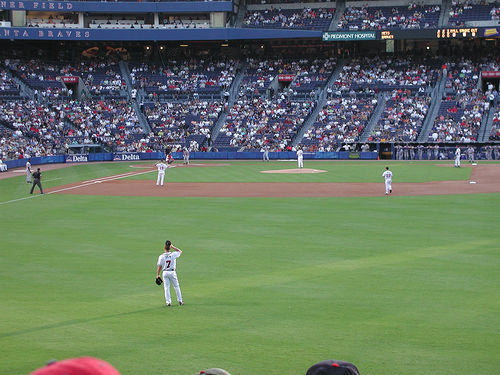

In [ ]:
train_dataset[0]["image"]

In [ ]:
train_dataset[0]["URL"]

'/content/images/134206.png'

In [ ]:
train_dataset[0]["text"]

'people The players of the baseball team are standing on scene the field , with people many people watching from scene the stands .people Baseball players are playing on scene a field in scene a stadium filled with people people .people A team plays other baseball at scene a large crowded stadium .people A crowd cheers on people a baseball team .other game is playing in scene the stadium'

In [ ]:
train_dataset[0]["URL"]

'/content/images/134206.png'

In [ ]:
valid_dataset = load_dataset("imagefolder", data_dir="/content/vad_images", split="train")  ## load vad data
print(valid_dataset)

Dataset({
    features: ['image', 'URL', 'text'],
    num_rows: 6
})


In [ ]:
naive_dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x375 at 0x7FDCF1DC8C50>,
 'URL': '/content/images/134206.png',
 'text': 'people The players of the baseball team are standing on scene the field , with people many people watching from scene the stands .people Baseball players are playing on scene a field in scene a stadium filled with people people .people A team plays other baseball at scene a large crowded stadium .people A crowd cheers on people a baseball team .other game is playing in scene the stadium'}

## Dataset transformation

#### Dataset token transformation

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"],  return_tensors="pt",padding=True,truncation=True)
    #return tokenizer(examples["text"],  return_tensors="pt",padding=True,truncation=True)


tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_valid_datasets = valid_dataset.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_train_datasets

Dataset({
    features: ['image', 'URL', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5
})

In [ ]:
torch.as_tensor(tokenized_train_datasets[1]["input_ids"])

tensor([  101,  2111,  1037,  2158,  4147,  5929,  1037,  3756,  3797,  1998,
         5929,  2304, 20376,  2003,  3061,  1999,  2392,  1997,  3496,  2019,
         2592,  9065,  2007,  2060,  2070,  6399,  1012,  2111,  2019,  9750,
         3060,  1011,  2137,  2158,  1999,  5929,  1037,  3756,  3797,  2003,
         3061,  1999,  2392,  1997,  3496,  2019,  2592,  3233,  1012,  2111,
         1037,  2158,  4855,  2030, 12771,  2060,  6399,  4832,  1999,  2392,
         1997,  2060,  1037,  3009,  1011,  2653,  2592,  3696,  1012,  2111,
         1037,  2158,  2007,  4683,  1037,  3780, 11122,  2003,  3061,  1999,
         2392,  1997,  2060,  2019,  2592,  3696,  1012,  2111,  1037,  2158,
         1999,  5929,  1037,  3756,  3797,  1998,  5929,  2304, 20376, 12771,
         2060,  6399,  1012,   102])

In [ ]:
torch.as_tensor(tokenized_train_datasets[0]["token_type_ids"])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
torch.as_tensor(tokenized_train_datasets[1]["attention_mask"])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

#### Dataset visual transformation

In [ ]:
def Meng_visual_embedding(images):
    frcnn_visualizer = SingleImageViz(images, id2obj=objids, id2attr=attrids)
    images, sizes, scales_yx = image_preprocess(images)
    output_dict = frcnn(
    images,
    sizes,
    scales_yx=scales_yx,
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt",
    )
    features = output_dict.get("roi_features")
    return features

visualized_train_dataset = tokenized_train_datasets.map(
    lambda x: {"visual_embeds": Meng_visual_embedding(x['URL']).squeeze()} 

)

visualized_valid_dataset = tokenized_valid_datasets.map(
    lambda x: {"visual_embeds": Meng_visual_embedding(x['URL']).squeeze()} 

)

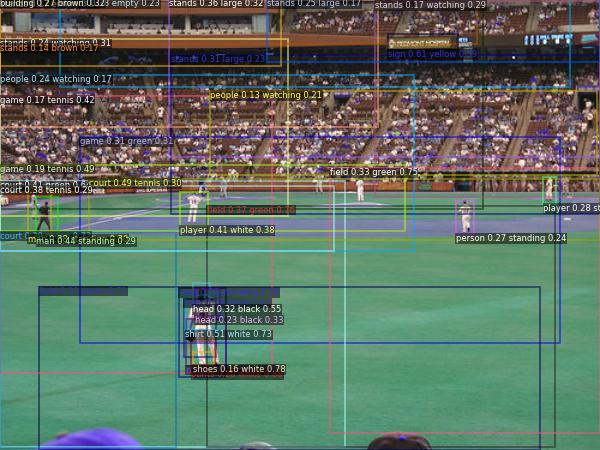

In [8]:
## plot the image features
location = "/content/images/134206.png"
#location = "/content/test123.jpg"

def showarray(a, fmt="jpeg"):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

frcnn_visualizer = SingleImageViz(location, id2obj=objids, id2attr=attrids)
# run frcnn
images, sizes, scales_yx = image_preprocess(location)
output_dict = frcnn(
    images,
    sizes,
    scales_yx=scales_yx,
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt",
)
# add boxes and labels to the image

frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"),
    output_dict.pop("obj_ids"),
    output_dict.pop("obj_probs"),
    output_dict.pop("attr_ids"),
    output_dict.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [ ]:
visualized_train_dataset=visualized_train_dataset.map(lambda x: {"visual_token_type_ids": torch.ones(torch.as_tensor(x["visual_embeds"]).shape[:-1], dtype=torch.long)})
visualized_train_dataset=visualized_train_dataset.map(lambda x: {"visual_attention_mask": torch.ones(torch.as_tensor(x["visual_embeds"]).shape[:-1], dtype=torch.float)})
visualized_train_dataset=visualized_train_dataset.map(lambda x: {"region_to_phrase_position": torch.ones((torch.as_tensor(x["input_ids"]).shape[-1] + (torch.as_tensor(x["visual_embeds"])).shape[-2])).type(torch.int64)})

visualized_train_dataset=visualized_train_dataset.map(lambda x: {"labels": torch.ones((5, torch.as_tensor(x["input_ids"]).shape[-1] + torch.as_tensor(x["visual_embeds"]).shape[-2], torch.as_tensor(x["visual_embeds"]).shape[-2]))})

## Transform training dataset


  0%|          | 0/5 [00:00<?, ?ex/s]

  0%|          | 0/5 [00:00<?, ?ex/s]

  0%|          | 0/5 [00:00<?, ?ex/s]

  0%|          | 0/5 [00:00<?, ?ex/s]

In [ ]:
torch.as_tensor(visualized_train_dataset[0]["region_to_phrase_position"]).shape

torch.Size([140])

In [ ]:
torch.as_tensor(visualized_train_dataset[0]["labels"]).shape

torch.Size([5, 140, 36])

In [ ]:
torch.as_tensor(visualized_train_dataset[0]["visual_embeds"]).shape

torch.Size([36, 2048])

In [ ]:
visualized_valid_dataset=visualized_valid_dataset.map(lambda x: {"visual_token_type_ids": torch.ones(torch.as_tensor(x["visual_embeds"]).shape[:-1], dtype=torch.long)})
visualized_valid_dataset=visualized_valid_dataset.map(lambda x: {"visual_attention_mask": torch.ones(torch.as_tensor(x["visual_embeds"]).shape[:-1], dtype=torch.float)})
visualized_valid_dataset=visualized_valid_dataset.map(lambda x: {"region_to_phrase_position": torch.ones((torch.as_tensor(x["input_ids"]).shape[-1] + (torch.as_tensor(x["visual_embeds"])).shape[-2])).type(torch.int64)})

visualized_valid_dataset=visualized_valid_dataset.map(lambda x: {"labels": torch.ones((5, torch.as_tensor(x["input_ids"]).shape[-1] + torch.as_tensor(x["visual_embeds"]).shape[-2], torch.as_tensor(x["visual_embeds"]).shape[-2]))})

## Transform validation dataset

  0%|          | 0/6 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ex/s]

### Demonstrate some images and contents

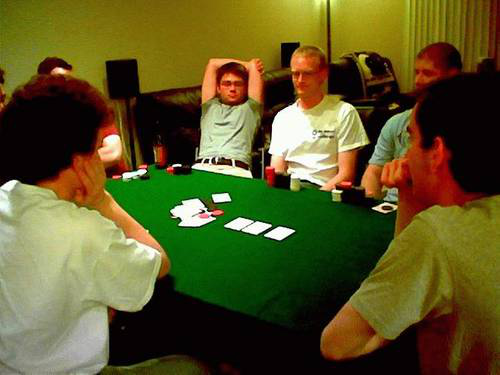

In [ ]:
visualized_train_dataset[2]["image"]


In [ ]:
visualized_train_dataset[2]["text"]


'people A group of friends playing other cards and trying to bluff notvisual each other into making other a terrible mistake .people A group of college students gathers to play other texas hold other em other poker .people Several men play other cards while around other a green table .people A group of several men playing other poker .people Six white males playing other poker .'

## Fine tuning

In [ ]:
from transformers import BertTokenizer, VisualBertForRegionToPhraseAlignment
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = VisualBertForRegionToPhraseAlignment.from_pretrained("uclanlp/visualbert-vqa-coco-pre")

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/448M [00:00<?, ?B/s]

Some weights of VisualBertForRegionToPhraseAlignment were not initialized from the model checkpoint at uclanlp/visualbert-vqa-coco-pre and are newly initialized: ['attention.key.bias', 'attention.value.weight', 'attention.query.bias', 'attention.query.weight', 'attention.key.weight', 'attention.value.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from transformers import TrainingArguments, Trainer

#training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=visualized_train_dataset,
    eval_dataset=visualized_valid_dataset,
    
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `VisualBertForRegionToPhraseAlignment.forward` and have been ignored: image, text, URL. If image, text, URL are not expected by `VisualBertForRegionToPhraseAlignment.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 5
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=3, training_loss=90304.70833333333, metrics={'train_runtime': 0.8513, 'train_samples_per_second': 17.619, 'train_steps_per_second': 3.524, 'total_flos': 1043012468160.0, 'train_loss': 90304.70833333333, 'epoch': 3.0})